In [1]:
print("hello Amit")


hello Amit


In [3]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
deliveries = pd.read_csv('deliveries (1).csv')
matches = pd.read_csv('matches.csv')
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [5]:
new = deliveries.merge(matches, left_on='match_id', right_on='id')
new.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'season', 'city', 'date',
       'match_type', 'player_of_match', 'venue', 'team1', 'team2',
       'toss_winner', 'toss_decision', 'winner', 'result', 'result_margin',
       'target_runs', 'target_overs', 'super_over', 'method', 'umpire1',
       'umpire2'],
      dtype='object')

In [6]:
a= deliveries['batting_team'].value_counts().reset_index()
fig = px.bar(
    a, 
    x="batting_team", 
    y="count", 
    # color="batter",   # optional: color by batte//r
    title="Average vs Runs (per Batter per Match)"
)
fig.show()

In [7]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [8]:
mask1 = deliveries['batter'].str.lower() == 'V kohli'.lower()
mask2 = deliveries['bowler'] == 'R Ashwin'
val = new[mask1 & mask2].groupby(['season','batter','bowler'])['total_runs'].count().reset_index().drop_duplicates(subset='season')
fig = px.bar(
    val, 
    x="season", 
    y="total_runs", 
    # color="batter",   # optional: color by batte//r
    title="Virat vs r Ashwin"
)
fig.show()

# # 🏏Batter vs ⚾Bowler

In [9]:
def Batter_Vs_Bowler(batter_name,bowler_name):
    mask1 = deliveries['batter'].str.lower() == batter_name.lower() # batter
    mask2 = deliveries['bowler'].str.lower() == bowler_name.lower() # bowler
    val = new[mask1 & mask2].groupby(['season','batter','bowler'])['total_runs'].count().reset_index().drop_duplicates(subset='season')
    
    fig = px.bar(val, x="season",
                 y="total_runs",
                 title=f"{batter_name} vs {bowler_name} Runs per Season"
                )
    
    return fig

In [10]:
Batter_Vs_Bowler('v kohli','r ashwin')

In [11]:
Batter_Vs_Bowler('v kohli','JJ Bumrah')

# # ⚾Ball thrown by SL Malinga

In [12]:
def bowler_data(bolwer_name):
    mask2 = deliveries['bowler'].str.lower() == bolwer_name.lower() #bowler is SL Malinga
    data = new[mask2].groupby(['season','bowling_team','bowler'])['ball'].count().reset_index().sort_values('season')

    plt.plot(data['season'], data['ball'], color = 'red', marker = 'o', linestyle = ':')
    plt.xlabel("Sesson")
    plt.ylabel("Number of Balls Thrown")
    plt.title(f"Ball thrown by {bolwer_name}")
    plt.grid()
    plt.show

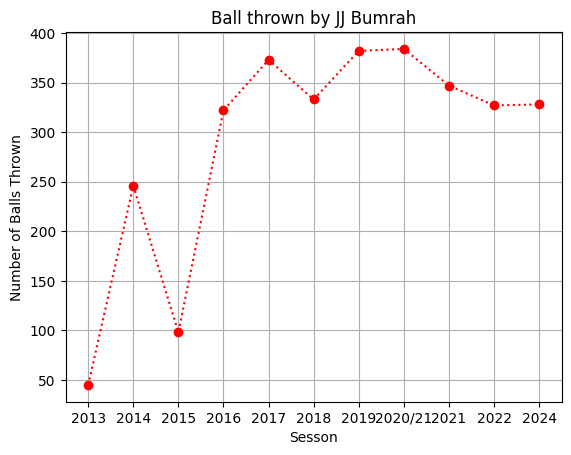

In [13]:
bowler_data('JJ Bumrah') # Bowler Name...

In [14]:
new.groupby(['season','bowler'])['ball'].count().reset_index().sort_values(["season","ball"],ascending=[True,False]).drop_duplicates(subset=['season'])

,season,bowler,ball
51,2007/08,MS Gony,371
174,2009,RP Singh,382
210,2009/10,A Kumble,389
447,2011,SL Malinga,397
554,2012,R Ashwin,402
640,2013,Harbhajan Singh,430
732,2014,AR Patel,403
830,2015,A Nehra,385
938,2016,B Kumar,414
1076,2017,JJ Bumrah,373


In [15]:
val = new.groupby(['season','bowling_team','bowler'])['ball'].count().reset_index().sort_values(["season","ball"],ascending=[True,False]).drop_duplicates(subset=['season'],keep='first')
px.bar(val, x="season", y="ball", title="Virat vs r Ashwin")

In [16]:
val = new.groupby(['season','bowling_team','bowler'])['ball'].count().reset_index().sort_values(["season","ball"],ascending=[True,False]).drop_duplicates(subset=['season'],keep='first')
px.scatter(val, x="season", y="ball", title="Number of balls bowler",color="bowler",)
# px.scatter(x=val['season'], y=val['ball'],color=val['bowling_team'],title='aaaaa',labels=)

In [17]:
mask2 = deliveries['bowler'].str.lower() == 'CV Varun'.lower()
new[mask2].groupby(['season','bowling_team','bowler'])['ball'].count().reset_index().sort_values('season')

,season,bowling_team,bowler,ball
0,2019,Kings XI Punjab,CV Varun,18
1,2020/21,Kolkata Knight Riders,CV Varun,313
2,2021,Kolkata Knight Riders,CV Varun,416
3,2022,Kolkata Knight Riders,CV Varun,245
4,2023,Kolkata Knight Riders,CV Varun,323
5,2024,Kolkata Knight Riders,CV Varun,309


In [18]:
new.groupby(['season','bowling_team','bowler'])['ball'].count().reset_index().sort_values(["season","ball"],ascending=[True,False]).drop_duplicates(subset=['season'],keep='first')


,season,bowling_team,bowler,ball
7,2007/08,Chennai Super Kings,MS Gony,371
118,2009,Deccan Chargers,RP Singh,382
318,2009/10,Royal Challengers Bangalore,A Kumble,389
420,2011,Mumbai Indians,SL Malinga,397
473,2012,Chennai Super Kings,R Ashwin,402
655,2013,Mumbai Indians,Harbhajan Singh,430
755,2014,Kings XI Punjab,AR Patel,403
829,2015,Chennai Super Kings,A Nehra,385
1024,2016,Sunrisers Hyderabad,B Kumar,414
1091,2017,Mumbai Indians,JJ Bumrah,373


In [19]:
mask = new['batsman_runs'] == 6 # filtering sixes
six = new[mask] # dataframe of sixes
pt = six.pivot_table(index="batting_team", columns="over", values="batsman_runs", aggfunc="count") # pivot table
pt


over,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
batting_team,,,,,,,,,,,,,,,,,,,,
Chennai Super Kings,9.0,36.0,67.0,71.0,75.0,85.0,48.0,40.0,64.0,48.0,76.0,76.0,75.0,86.0,82.0,90.0,87.0,126.0,116.0,152.0
Deccan Chargers,3.0,21.0,11.0,17.0,27.0,22.0,11.0,13.0,17.0,14.0,15.0,26.0,23.0,22.0,20.0,21.0,38.0,37.0,23.0,19.0
Delhi Capitals,7.0,17.0,31.0,32.0,41.0,22.0,19.0,22.0,21.0,20.0,21.0,20.0,37.0,19.0,32.0,33.0,36.0,38.0,37.0,45.0
Delhi Daredevils,14.0,23.0,35.0,44.0,34.0,32.0,23.0,31.0,36.0,30.0,39.0,41.0,45.0,40.0,34.0,51.0,64.0,52.0,65.0,68.0
Gujarat Lions,4.0,6.0,14.0,9.0,11.0,12.0,10.0,6.0,11.0,8.0,5.0,7.0,5.0,8.0,5.0,5.0,7.0,9.0,9.0,4.0
Gujarat Titans,5.0,7.0,6.0,7.0,9.0,10.0,7.0,6.0,12.0,8.0,14.0,15.0,11.0,12.0,21.0,17.0,18.0,26.0,28.0,32.0
Kings XI Punjab,21.0,33.0,42.0,52.0,48.0,53.0,40.0,46.0,56.0,44.0,51.0,53.0,58.0,62.0,61.0,81.0,53.0,68.0,72.0,81.0
Kochi Tuskers Kerala,2.0,4.0,3.0,3.0,3.0,3.0,2.0,2.0,1.0,3.0,1.0,3.0,2.0,3.0,4.0,NaN,3.0,4.0,5.0,2.0
Kolkata Knight Riders,31.0,51.0,59.0,65.0,60.0,74.0,48.0,68.0,59.0,61.0,71.0,83.0,89.0,79.0,88.0,104.0,103.0,104.0,114.0,84.0


<Axes: xlabel='over', ylabel='batting_team'>

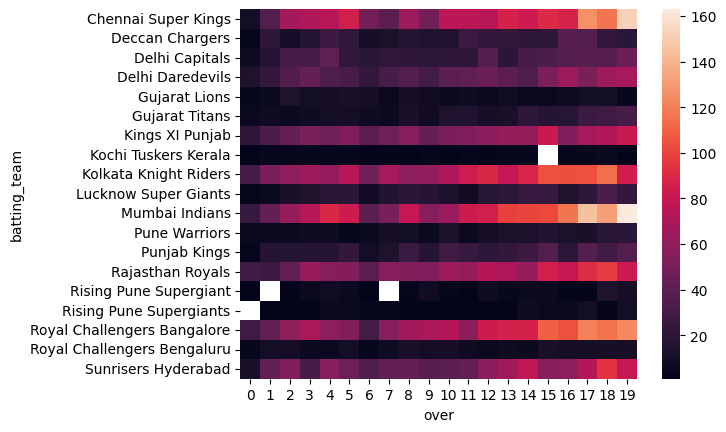

In [20]:
sns.heatmap(pt) # heatmap

In [21]:
toss_decisions = new['toss_decision'].value_counts()
fig3 = px.pie(values=toss_decisions.values, names=toss_decisions.index,
              title='Toss Decisions in IPL')
fig3.show()

In [22]:
new.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder', 'id', 'season', 'city', 'date',
       'match_type', 'player_of_match', 'venue', 'team1', 'team2',
       'toss_winner', 'toss_decision', 'winner', 'result', 'result_margin',
       'target_runs', 'target_overs', 'super_over', 'method', 'umpire1',
       'umpire2'],
      dtype='object')

In [23]:
deliveries.columns
matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [24]:
Mumbai_Indians = new[new['winner'].str.lower() == 'Mumbai Indians'.lower()]
Mumbai_Indians.head()


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,...,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
3536,335997,1,Kolkata Knight Riders,Mumbai Indians,0,1,BB McCullum,SM Pollock,SC Ganguly,1,...,bat,Mumbai Indians,wickets,7.0,138.0,20.0,N,NaN,BF Bowden,AV Jayaprakash
3537,335997,1,Kolkata Knight Riders,Mumbai Indians,0,2,SC Ganguly,SM Pollock,BB McCullum,4,...,bat,Mumbai Indians,wickets,7.0,138.0,20.0,N,NaN,BF Bowden,AV Jayaprakash
3538,335997,1,Kolkata Knight Riders,Mumbai Indians,0,3,SC Ganguly,SM Pollock,BB McCullum,0,...,bat,Mumbai Indians,wickets,7.0,138.0,20.0,N,NaN,BF Bowden,AV Jayaprakash
3539,335997,1,Kolkata Knight Riders,Mumbai Indians,0,4,RT Ponting,SM Pollock,BB McCullum,1,...,bat,Mumbai Indians,wickets,7.0,138.0,20.0,N,NaN,BF Bowden,AV Jayaprakash
3540,335997,1,Kolkata Knight Riders,Mumbai Indians,0,5,BB McCullum,SM Pollock,RT Ponting,0,...,bat,Mumbai Indians,wickets,7.0,138.0,20.0,N,NaN,BF Bowden,AV Jayaprakash


In [25]:
# mask = ['caught']
# top_bowlers = new[deliveries['dismissal_kind'].isin(mask)].groupby(['season','bowler'])['dismissal_kind'].count().reset_index(name='wickets').sort_values(['season','wickets'],ascending=[True,False]).drop_duplicates(subset=['season'])

# fig = go.Figure(
#     go.Scatter(
#         x=top_bowlers['season'],
#         y=top_bowlers['wickets'],
#         mode='lines+markers+text',
#         text=top_bowlers['bowler'],
#         # textposition='top center',
#         line=dict(color='blue'),
#         # marker=dict(size=8)
#     )
# )

# fig.update_layout(
#     title='Top Bowler by Caught Dismissals Each Season',
#     xaxis_title='Season',
#     yaxis_title='Caught Dismissals'
# )

# fig.show()


In [26]:
deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [27]:
deliveries['fielder'].unique()

array([nan, 'JH Kallis', 'P Kumar', 'CL White', 'M Kartik', 'RT Ponting',
       'WP Saha', 'AB Agarkar', 'BB McCullum', 'KC Sangakkara',
       'IK Pathan', 'PA Patel', 'Joginder Sharma', 'P Amarnath',
       'M Manhas', 'B Geeves', 'V Kohli', 'Z Khan', 'MV Boucher',
       'AM Nayar', 'L Ronchi', 'LR Shukla', 'Mohammad Hafeez', 'AB Dinda',
       'DJ Hussey', 'SC Ganguly', 'RG Sharma', 'SB Styris', 'A Symonds',
       'Kamran Akmal', 'RA Jadeja', 'PP Chawla', 'S Dhawan', 'KD Karthik',
       'MK Tiwary', 'GD McGrath', 'G Gambhir', 'AC Gilchrist', 'DJ Bravo',
       'Harbhajan Singh', 'S Badrinath', 'JDP Oram', 'SK Raina',
       'D Salunkhe', 'SB Bangar', 'D Kalyankrishna', 'VVS Laxman',
       'DS Kulkarni', 'AM Rahane', 'A Nehra', 'B Lee', 'RR Sarwan',
       'Yuvraj Singh', 'MM Patel', 'GC Smith', 'M Rawat', 'Sohail Tanvir',
       'A Kumble', 'M Muralitharan', 'MS Dhoni', 'I Sharma', 'PP Ojha',
       'DPMD Jayawardene', 'V Sehwag', 'W Jaffer', 'R Vinay Kumar',
       'R Dravid',

In [28]:
matches.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')

In [29]:
Mumbai_Indians = new[new['winner'].str.lower() == 'Mumbai Indians'.lower()]
Mumbai_Indians = Mumbai_Indians[Mumbai_Indians['city'] == 'Mumbai']
Mumbai_Indians = Mumbai_Indians.groupby(['season','city'])['winner'].value_counts().reset_index()
Mumbai_Indians

,season,city,winner,count
0,2007/08,Mumbai,Mumbai Indians,797
1,2009/10,Mumbai,Mumbai Indians,1975
2,2011,Mumbai,Mumbai Indians,1468
3,2012,Mumbai,Mumbai Indians,721
4,2013,Mumbai,Mumbai Indians,1945
5,2014,Mumbai,Mumbai Indians,953
6,2015,Mumbai,Mumbai Indians,1253
7,2016,Mumbai,Mumbai Indians,470
8,2017,Mumbai,Mumbai Indians,1241
9,2018,Mumbai,Mumbai Indians,748


In [30]:
mask = deliveries['batter'].str.lower() == 'v kohli'.lower()
mask1 = deliveries['total_runs'].isin([1,2,3,4,6])
data = deliveries[mask & mask1]
val = data['total_runs'].value_counts()
px.pie(names= val.index, values=val, title='Runs Taken by V. Kohli (1, 2, 3, 4, 6)')

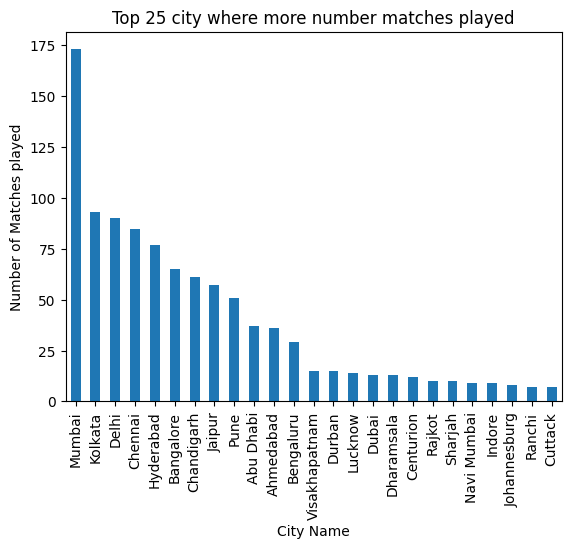

In [31]:
val=matches['city'].value_counts().head(25).plot(kind='bar', title="Top 25 city where more number matches played", xlabel='City Name', ylabel='Number of Matches played')
plt.show()

## Most 🏏6s per season...¶

In [32]:
mask = new['batsman_runs'] == 6 # filtering sixes
new[mask].groupby(['season','batter'])['batsman_runs'].count().reset_index().sort_values(['season',"batsman_runs"],ascending=[True,False]).drop_duplicates(subset=['season']) # top six hitters each season

,season,batter,batsman_runs
80,2007/08,ST Jayasuriya,31
102,2009,AC Gilchrist,29
245,2009/10,RV Uthappa,27
286,2011,CH Gayle,44
388,2012,CH Gayle,59
486,2013,CH Gayle,52
591,2014,GJ Maxwell,36
661,2015,CH Gayle,38
829,2016,V Kohli,38
856,2017,DA Warner,26


<Axes: xlabel='over', ylabel='batting_team'>

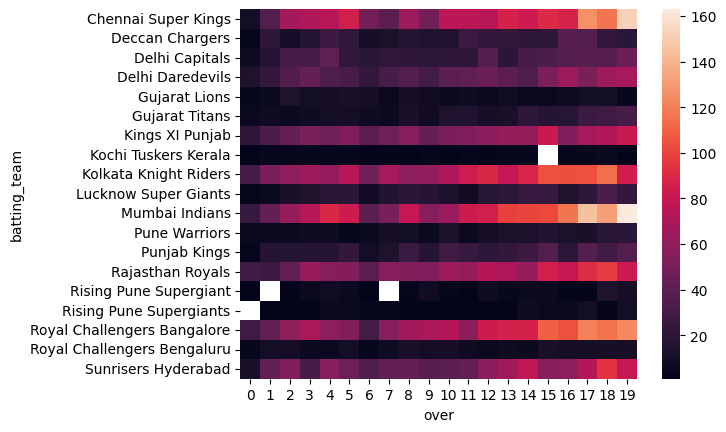

In [33]:
mask = new['batsman_runs'] == 6 # filtering sixes
six = new[mask] # dataframe of sixes
pt = six.pivot_table(index="batting_team", columns="over", values="batsman_runs", aggfunc="count") # pivot table
sns.heatmap(pt) # heatmap

## Most 🏏4s per season

In [34]:
mask = new['batsman_runs'] == 4 # filtering four
new[mask].groupby(['season','batter'])['batsman_runs'].count().reset_index().sort_values(['season',"batsman_runs"],ascending=[True,False]).drop_duplicates(subset=['season']) # top six hitters each season

,season,batter,batsman_runs
28,2007/08,G Gambhir,68
176,2009,ML Hayden,60
334,2009/10,SR Tendulkar,86
464,2011,SR Tendulkar,67
500,2012,AM Rahane,73
683,2013,MEK Hussey,81
814,2014,RV Uthappa,74
856,2015,DA Warner,65
956,2016,DA Warner,88
1070,2017,DA Warner,63


## Purple 🧢Cap...

In [35]:
mask = ['bowled','lbw','stumped','caught and bowled','hit wicket','run out']
purple_cap = new[new['dismissal_kind'].isin(mask)].groupby(['season','bowler'])['dismissal_kind'].count().reset_index(name='wickets').sort_values(['season','wickets'], ascending=[True,False]).drop_duplicates(subset='season',keep='first').sort_values('season')
purple_cap

,season,bowler,wickets
22,2007/08,IK Pathan,16
138,2009,SL Malinga,14
150,2009/10,A Kumble,13
309,2011,SL Malinga,20
398,2012,SP Narine,16
482,2013,SL Malinga,16
556,2014,SP Narine,16
606,2015,MA Starc,13
653,2016,CH Morris,11
742,2017,JJ Bumrah,15


In [36]:
toss_decisions = new['toss_decision'].value_counts()
fig3 = px.pie(values=toss_decisions.values, names=toss_decisions.index,
              title='Toss Decisions in IPL')
fig3.show()

In [37]:
new.sort_values(by='season', ascending=True)[['toss_winner','season']].drop_duplicates(subset=['season'], keep='first').reset_index() # toss winners each year in first

,index,toss_winner,season
0,0,Royal Challengers Bangalore,2007/08
1,22553,Royal Challengers Bangalore,2009
2,36762,Deccan Chargers,2009/10
3,52933,Delhi Daredevils,2011
4,70443,Delhi Daredevils,2012
5,88491,Sunrisers Hyderabad,2013
6,104079,Delhi Daredevils,2014
7,117952,Delhi Daredevils,2015
8,131900,Sunrisers Hyderabad,2016
9,145834,Delhi Daredevils,2017
